In [127]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ratings/desafio_ratings.csv
/kaggle/input/details/desafio_details.csv





## Importando as bibliotecas que serão utilizadas

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from geopy.geocoders import Nominatim

## Lendo e filtrando os arquivos csv

In [129]:
details = pd.read_csv("/kaggle/input/details/desafio_details.csv", encoding='latin-1', sep=';')
ratings = pd.read_csv("/kaggle/input/ratings/desafio_ratings.csv", encoding='latin-1', sep=';')


In [130]:
# Remove features desnecessárias para análise
details_filtrado = details.drop(columns=['Unnamed: 0'])
ratings_filtrado = ratings.drop(columns=['Unnamed: 0'])

# Droping data que possui quantidade insignificante de missing values
ratings_filtrado1 = ratings_filtrado.dropna(subset=['Total'])


In [131]:
imoveis = pd.merge(details_filtrado, ratings_filtrado, on='hotel_id')   #Juntando os dois arquivos csv

## Ordernando as cidades de forma crescente pelo número de listings

In [132]:
listings = imoveis['city_name'].value_counts().reset_index()      #Conta o número de listings de cada cidade nos Dados
listings.columns = ['city_name', 'listings']                      #Tabela com a cidade e o numero de listings
listings = listings.sort_values(by='listings', ascending=False)   #Deixando em ordem crescente

print(listings.head(10))


            city_name  listings
0       Florianópolis       762
1             Goiânia       138
2           Bombinhas        65
3             Ubatuba        35
4  Balneário Camboriú        35
5          Anitápolis        27
6    Campos do Jordão        24
7            Imbituba        23
8             Itapema        22
9        Porto Alegre        19


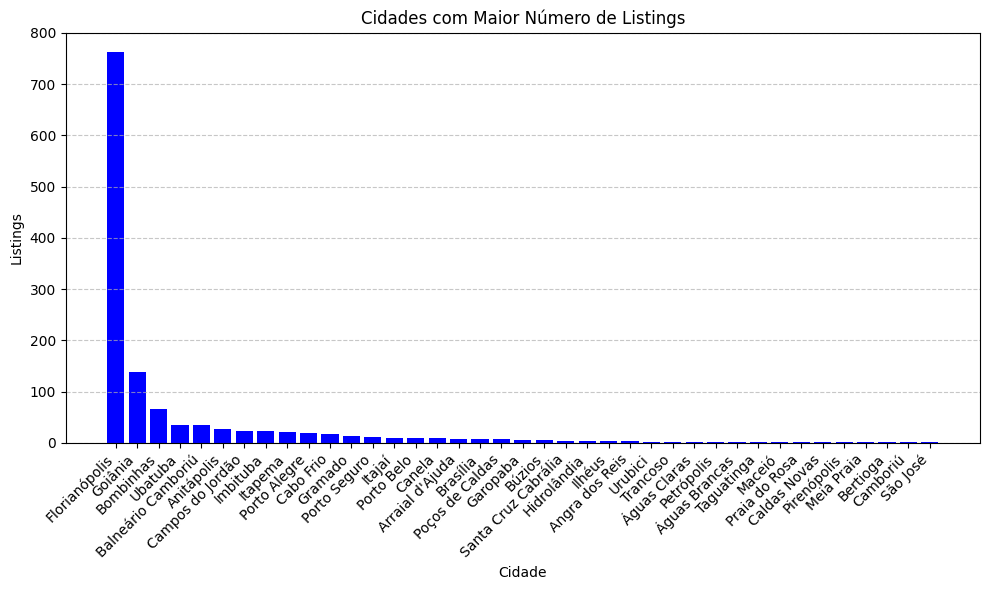

In [133]:
#Grafico com as top10 cidades com maior numero de listings

plt.figure(figsize = (10,6))
plt.bar(listings['city_name'], listings['listings'], color='blue')
plt.title('Cidades com Maior Número de Listings')
plt.xlabel('Cidade')
plt.ylabel('Listings')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Ordene as cidades em ordem decrescente de metros quadrados

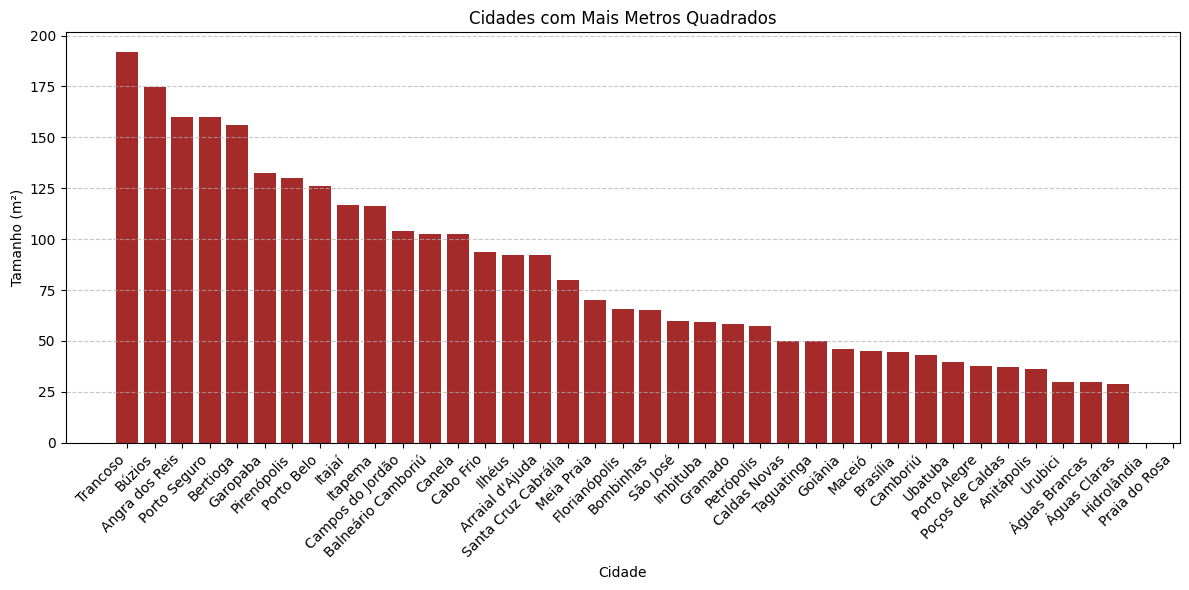

In [134]:
tamanho = imoveis[['city_name', 'room_surface_in_m2']]
tamanho = imoveis[['city_name', 'room_surface_in_m2']].groupby('city_name').mean().reset_index()
tamanho = tamanho.sort_values(by='room_surface_in_m2', ascending=False) 

plt.figure(figsize = (12,6))
plt.bar(tamanho['city_name'], tamanho['room_surface_in_m2'], color='brown')
plt.title('Cidades com Mais Metros Quadrados')
plt.xlabel('Cidade')
plt.ylabel('Tamanho (m²)')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

#Nao entendi a pergunta, mas penso em fazer a media do room surface de todos os ap da cidade e depois comparar entre as cidades

In [135]:
#Quais cidades têm mais avaliações?

Numero_avaliacoes= imoveis.groupby('city_name')['number_of_ratings'].sum().reset_index()       #Somando todos as avaliações de cada cidade
Numero_avaliacoes = Numero_avaliacoes.sort_values(by='number_of_ratings', ascending=False)     #Ordem crescente 

print(Numero_avaliacoes.head(10))                                                              #Printando o top10 com mais avaliaçoes

             city_name  number_of_ratings
13       Florianópolis              87353
1           Anitápolis               2106
11    Campos do Jordão               1815
5            Bombinhas               1126
15             Goiânia                531
3   Balneário Camboriú                 54
20              Itajaí                 23
21             Itapema                 19
16             Gramado                 15
35             Ubatuba                 15


In [136]:
#Quais cidades têm a maior média de avaliações? E a menor média?

def juntando(linha):
    if pd.notna(linha['number_of_ratings']):                        #Para cada linha da coluna number_of_ratings será verdadeiro caso NÂO for NaN
        linha['Total'] = linha['Total']* linha['number_of_ratings'] #Multiplicando a nota total pelo numero de avaliaçoes
    else:
        linha['Total'] = linha['Total']                             #Caso for FALSO não vai multiplicar nada
    
    return linha                                           
 
avaliacoes = imoveis.apply(juntando, axis=1)                                                                  # Aplicando a função juntando no arquivo
avaliacoes = avaliacoes[['city_name', 'number_of_ratings', 'Total']]
avaliacoes = avaliacoes.groupby('city_name').agg({'Total': 'sum', 'number_of_ratings': 'sum'}).reset_index()  #Somando todas as notas da cidade
avaliacoes['Nota_media'] = avaliacoes['Total']/avaliacoes['number_of_ratings']
avaliacoes['Nota_media'] = avaliacoes['Nota_media'].apply(lambda x: round(x, 2))                              #Deixando com duas casa decimais
avaliacoes = avaliacoes.sort_values(by='Nota_media', ascending=False)

avaliacoes[['city_name','Nota_media']].head(10)

,city_name,Nota_media
0,Angra dos Reis,10.00
6,Brasília,10.00
18,Ilhéus,10.00
27,Porto Belo,9.75
24,Petrópolis,9.62
32,São José,9.50
8,Cabo Frio,9.50
35,Ubatuba,9.47
1,Anitápolis,9.40
14,Garopaba,9.33


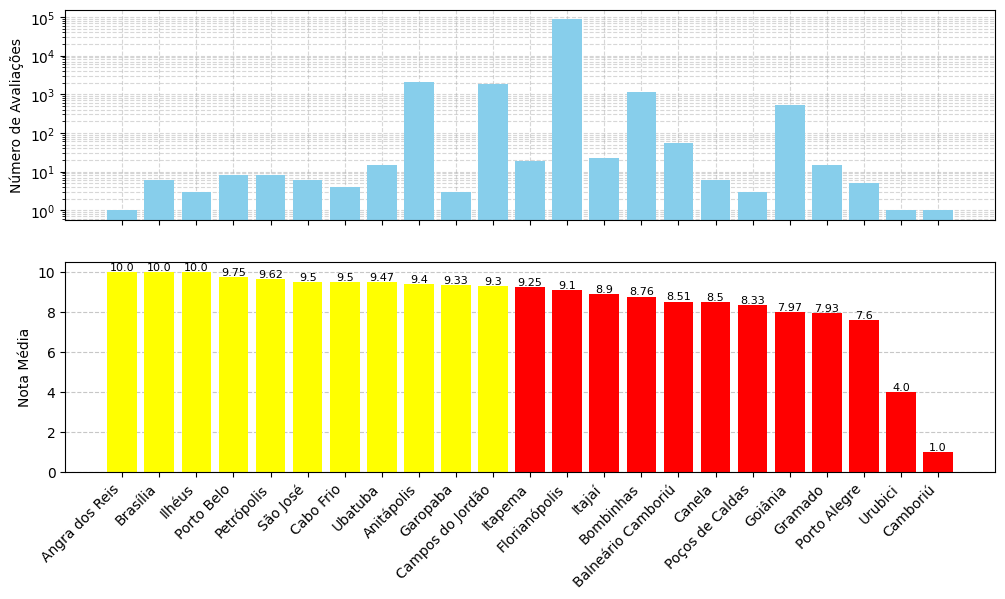

In [137]:
#Plotando o gráfico de numero de avaliações com Nota media

avaliacoes = avaliacoes.head(23)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

ax1.bar(avaliacoes['city_name'], avaliacoes['number_of_ratings'], color='skyblue', zorder=2)
ax1.set_ylabel('Número de Avaliações')
ax1.set_yscale('log') 
ax1.grid(True, which='both', linestyle='--', alpha=0.5, zorder=1) 
ax1.set_zorder(3)
ax1.patch.set_visible(False)

separando = len(avaliacoes) // 2                                         #Separando as melhores notas e as piores notas
cor = ['yellow'] * separando + ['red'] * (len(avaliacoes) - separando)
ax2.bar(avaliacoes['city_name'], avaliacoes['Nota_media'], color=cor , zorder=2)
ax2.set_ylabel('Nota Média')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7,zorder=1)
ax2.set_zorder(3)
ax2.patch.set_visible(False)

for rect, label in zip(bar2, avaliacoes['Nota_media']):                #Adicionando as notas medias indicadas nas barras para melhor visualização
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom', color='black', fontsize=8)

plt.show()

## Existem correlações entre as características de um anúncio e a sua localização?

In [138]:
imoveis

,hotel_id,room_id,hotel_name_x,city_name,accommodation_type,room_name,room_surface_in_m2,room_facilities,hotel_name_y,url,Comodidades,Limpeza,Conforto,Custo-benefício,Localização,Total,WiFi gratuito,number_of_ratings
0,10966118,1096611801,Casa em lindo cond. a 5min da praia PEV105,Ubatuba,holiday_home,Casa de 3 Quartos,220.00,"['Taças de vinho', 'Cozinha', 'Vaso sanitário'...",Casa em lindo cond. a 5min da praia PEV105,https://www.booking.com/hotel/br/casa-em-lindo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,10959776,1095977602,Apartamentos no Jardim Goiás Goiânia/GO - THO,Goiânia,apartment,Apartamento,48.00,"['Banheiro privativo', 'Secador de cabelo', 'S...",Apartamentos no Jardim Goiás Goiânia/GO - THO,https://www.booking.com/hotel/br/apartamentos-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,10949139,1094913902,Casa triplex em condomínio Floripa-SC ALI024,Florianópolis,holiday_home,Casa de Temporada,170.00,"['Área de estar', 'Toalete adicional', 'Utensí...",Casa triplex em condomínio Floripa-SC ALI024,https://www.booking.com/hotel/br/casa-triplex-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,10948439,1094843901,Apto com piscina no centro de Floripa PCE0406,Florianópolis,apartment,Apartamento de 1 Quarto,32.00,"['Acessível por elevador', 'Chuveiro', 'Mesa d...",Apto com piscina no centro de Floripa PCE0406,https://www.booking.com/hotel/br/apto-com-pisc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,10943450,1094345002,Apto espaçoso na beira do lago em Ilhéus ARS0169,Ilhéus,holiday_home,Casa de 3 Quartos,134.74,"['Fogão', 'Guarda-roupa ou armário', 'Toalhas'...",Apto espaçoso na beira do lago em Ilhéus ARS0169,https://www.booking.com/hotel/br/apto-espacoso...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,359731,35973107,Lindo condomínio em meio à natureza em Bombinh...,Bombinhas,guest_house,Apartamento com Varanda,50.00,"['Secador de cabelo', 'Vaso sanitário', 'Andar...",Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,8.1,88
1287,359731,35973108,Lindo condomínio em meio à natureza em Bombinh...,Bombinhas,guest_house,Apartamento com Varanda,53.00,"['Banheiro privativo', 'Máquina de café', 'Mes...",Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,8.1,88
1288,359731,35973109,Lindo condomínio em meio à natureza em Bombinh...,Bombinhas,guest_house,Apartamento com Varanda,50.00,"['Chave de acesso', 'Travesseiro comum', 'TV d...",Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,8.1,88
1289,359731,35973110,Lindo condomínio em meio à natureza em Bombinh...,Bombinhas,guest_house,Apartamento com Varanda,50.00,"['Ar-condicionado', 'TV de tela plana', 'Micro...",Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,8.1,88


In [139]:
imoveis['num_room_facilities'] = imoveis['room_facilities'].apply(lambda x: len(x.split(',')))  #Numero de 'facilities' em cada apartamento
imoveis_corr = imoveis

imoveis_corr# Novo dataset para analise da correlação

,hotel_id,room_id,hotel_name_x,city_name,accommodation_type,room_name,room_surface_in_m2,room_facilities,hotel_name_y,url,Comodidades,Limpeza,Conforto,Custo-benefício,Localização,Total,WiFi gratuito,number_of_ratings,num_room_facilities
0,10966118,1096611801,Casa em lindo cond. a 5min da praia PEV105,Ubatuba,holiday_home,Casa de 3 Quartos,220.00,"['Taças de vinho', 'Cozinha', 'Vaso sanitário'...",Casa em lindo cond. a 5min da praia PEV105,https://www.booking.com/hotel/br/casa-em-lindo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,38
1,10959776,1095977602,Apartamentos no Jardim Goiás Goiânia/GO - THO,Goiânia,apartment,Apartamento,48.00,"['Banheiro privativo', 'Secador de cabelo', 'S...",Apartamentos no Jardim Goiás Goiânia/GO - THO,https://www.booking.com/hotel/br/apartamentos-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,31
2,10949139,1094913902,Casa triplex em condomínio Floripa-SC ALI024,Florianópolis,holiday_home,Casa de Temporada,170.00,"['Área de estar', 'Toalete adicional', 'Utensí...",Casa triplex em condomínio Floripa-SC ALI024,https://www.booking.com/hotel/br/casa-triplex-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,27
3,10948439,1094843901,Apto com piscina no centro de Floripa PCE0406,Florianópolis,apartment,Apartamento de 1 Quarto,32.00,"['Acessível por elevador', 'Chuveiro', 'Mesa d...",Apto com piscina no centro de Floripa PCE0406,https://www.booking.com/hotel/br/apto-com-pisc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,29
4,10943450,1094345002,Apto espaçoso na beira do lago em Ilhéus ARS0169,Ilhéus,holiday_home,Casa de 3 Quartos,134.74,"['Fogão', 'Guarda-roupa ou armário', 'Toalhas'...",Apto espaçoso na beira do lago em Ilhéus ARS0169,https://www.booking.com/hotel/br/apto-espacoso...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,359731,35973107,Lindo condomínio em meio à natureza em Bombinh...,Bombinhas,guest_house,Apartamento com Varanda,50.00,"['Secador de cabelo', 'Vaso sanitário', 'Andar...",Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,8.1,88,34
1287,359731,35973108,Lindo condomínio em meio à natureza em Bombinh...,Bombinhas,guest_house,Apartamento com Varanda,53.00,"['Banheiro privativo', 'Máquina de café', 'Mes...",Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,8.1,88,35
1288,359731,35973109,Lindo condomínio em meio à natureza em Bombinh...,Bombinhas,guest_house,Apartamento com Varanda,50.00,"['Chave de acesso', 'Travesseiro comum', 'TV d...",Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,8.1,88,33
1289,359731,35973110,Lindo condomínio em meio à natureza em Bombinh...,Bombinhas,guest_house,Apartamento com Varanda,50.00,"['Ar-condicionado', 'TV de tela plana', 'Micro...",Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,8.1,88,34


In [140]:
imoveis_city = imoveis[['city_name', 'Localização']].drop_duplicates(subset='city_name')
imoveis_city

,city_name,Localização
0,Ubatuba,NaN
1,Goiânia,NaN
2,Florianópolis,NaN
4,Ilhéus,NaN
25,Búzios,NaN
28,Pirenópolis,NaN
31,Balneário Camboriú,NaN
32,Porto Alegre,NaN
33,Garopaba,NaN
34,Porto Seguro,NaN


In [141]:
#Pegando a Loatitude e longitude para CITY_NAME

from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="myLocation")
location = geolocator.geocode("Porto Belo")
location.point

Point(-27.1542415, -48.5424395, 0.0)

In [142]:
#Pegando a Loatitude e longitude para CITY_NAME

geolocator = Nominatim(user_agent="myLocation")
#location = geolocator.geocode("Porto Belo")
#location.point

def get_coordinates(city):                         # Função para obter as coordenadas de uma cidade
    location = geolocator.geocode(city)
    if location is not None:
        return location.point
    else:
        return None
imoveis_city['coordinates'] = imoveis_city['city_name'].apply(get_coordinates)

# Cria colunas separadas para latitude e longitude
imoveis_city[['Latitude', 'Longitude']] = imoveis_city['coordinates'].apply(lambda x: pd.Series({'Latitude': x.latitude, 'Longitude': x.longitude}) if x else pd.Series([None, None]))

imoveis_city = imoveis_city.drop('coordinates', axis=1)
imoveis_city = imoveis_city.drop('Localização', axis=1)

#Add os valores de Latitude e Longitude de cada cidade no dataframe de correlação
imoveis_corr = pd.merge(imoveis_corr, imoveis_city[['city_name', 'Latitude', 'Longitude']], on='city_name', how='left')

In [151]:
len(imoveis_city)

39

In [143]:
imoveis_corr

,hotel_id,room_id,hotel_name_x,city_name,accommodation_type,room_name,room_surface_in_m2,room_facilities,hotel_name_y,url,...,Limpeza,Conforto,Custo-benefício,Localização,Total,WiFi gratuito,number_of_ratings,num_room_facilities,Latitude,Longitude
0,10966118,1096611801,Casa em lindo cond. a 5min da praia PEV105,Ubatuba,holiday_home,Casa de 3 Quartos,220.00,"['Taças de vinho', 'Cozinha', 'Vaso sanitário'...",Casa em lindo cond. a 5min da praia PEV105,https://www.booking.com/hotel/br/casa-em-lindo...,...,NaN,NaN,NaN,NaN,NaN,NaN,0,38,-23.433162,-45.083415
1,10959776,1095977602,Apartamentos no Jardim Goiás Goiânia/GO - THO,Goiânia,apartment,Apartamento,48.00,"['Banheiro privativo', 'Secador de cabelo', 'S...",Apartamentos no Jardim Goiás Goiânia/GO - THO,https://www.booking.com/hotel/br/apartamentos-...,...,NaN,NaN,NaN,NaN,NaN,NaN,0,31,-16.680882,-49.253269
2,10949139,1094913902,Casa triplex em condomínio Floripa-SC ALI024,Florianópolis,holiday_home,Casa de Temporada,170.00,"['Área de estar', 'Toalete adicional', 'Utensí...",Casa triplex em condomínio Floripa-SC ALI024,https://www.booking.com/hotel/br/casa-triplex-...,...,NaN,NaN,NaN,NaN,NaN,NaN,0,27,-27.597300,-48.549610
3,10948439,1094843901,Apto com piscina no centro de Floripa PCE0406,Florianópolis,apartment,Apartamento de 1 Quarto,32.00,"['Acessível por elevador', 'Chuveiro', 'Mesa d...",Apto com piscina no centro de Floripa PCE0406,https://www.booking.com/hotel/br/apto-com-pisc...,...,NaN,NaN,NaN,NaN,NaN,NaN,0,29,-27.597300,-48.549610
4,10943450,1094345002,Apto espaçoso na beira do lago em Ilhéus ARS0169,Ilhéus,holiday_home,Casa de 3 Quartos,134.74,"['Fogão', 'Guarda-roupa ou armário', 'Toalhas'...",Apto espaçoso na beira do lago em Ilhéus ARS0169,https://www.booking.com/hotel/br/apto-espacoso...,...,NaN,NaN,NaN,NaN,NaN,NaN,0,22,-14.792599,-39.045384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,359731,35973107,Lindo condomínio em meio à natureza em Bombinh...,Bombinhas,guest_house,Apartamento com Varanda,50.00,"['Secador de cabelo', 'Vaso sanitário', 'Andar...",Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,...,8.7,8.8,8.5,8.5,8.7,8.1,88,34,-27.151916,-48.487569
1287,359731,35973108,Lindo condomínio em meio à natureza em Bombinh...,Bombinhas,guest_house,Apartamento com Varanda,53.00,"['Banheiro privativo', 'Máquina de café', 'Mes...",Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,...,8.7,8.8,8.5,8.5,8.7,8.1,88,35,-27.151916,-48.487569
1288,359731,35973109,Lindo condomínio em meio à natureza em Bombinh...,Bombinhas,guest_house,Apartamento com Varanda,50.00,"['Chave de acesso', 'Travesseiro comum', 'TV d...",Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,...,8.7,8.8,8.5,8.5,8.7,8.1,88,33,-27.151916,-48.487569
1289,359731,35973110,Lindo condomínio em meio à natureza em Bombinh...,Bombinhas,guest_house,Apartamento com Varanda,50.00,"['Ar-condicionado', 'TV de tela plana', 'Micro...",Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,...,8.7,8.8,8.5,8.5,8.7,8.1,88,34,-27.151916,-48.487569


In [144]:
#Substituindo os valores string para fazer a correlação
imoveis_corr['hotel_name_x'] = pd.Categorical(imoveis['hotel_name_x']).codes    
imoveis_corr['hotel_name_y'] = pd.Categorical(imoveis['hotel_name_x']).codes 
imoveis_corr['accommodation_type'] = pd.Categorical(imoveis['accommodation_type']).codes
imoveis_corr['room_name'] = pd.Categorical(imoveis['room_name']).codes
imoveis_corr['room_facilities'] = pd.Categorical(imoveis['room_facilities']).codes
imoveis_corr['city_name'] = pd.Categorical(imoveis['city_name']).codes
imoveis_corr = imoveis_corr.drop('url', axis=1)


In [145]:
imoveis_corr

,hotel_id,room_id,hotel_name_x,city_name,accommodation_type,room_name,room_surface_in_m2,room_facilities,hotel_name_y,Comodidades,Limpeza,Conforto,Custo-benefício,Localização,Total,WiFi gratuito,number_of_ratings,num_room_facilities,Latitude,Longitude
0,10966118,1096611801,396,35,4,22,220.00,810,396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,38,-23.433162,-45.083415
1,10959776,1095977602,43,15,0,0,48.00,115,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,31,-16.680882,-49.253269
2,10949139,1094913902,419,13,4,25,170.00,1088,419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,27,-27.597300,-48.549610
3,10948439,1094843901,144,13,0,15,32.00,2,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,29,-27.597300,-48.549610
4,10943450,1094345002,213,18,4,22,134.74,357,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,22,-14.792599,-39.045384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,359731,35973107,568,5,3,10,50.00,723,568,8.5,8.7,8.8,8.5,8.5,8.7,8.1,88,34,-27.151916,-48.487569
1287,359731,35973108,568,5,3,10,53.00,109,568,8.5,8.7,8.8,8.5,8.5,8.7,8.1,88,35,-27.151916,-48.487569
1288,359731,35973109,568,5,3,10,50.00,215,568,8.5,8.7,8.8,8.5,8.5,8.7,8.1,88,33,-27.151916,-48.487569
1289,359731,35973110,568,5,3,10,50.00,48,568,8.5,8.7,8.8,8.5,8.5,8.7,8.1,88,34,-27.151916,-48.487569


In [146]:
# Calcula a matriz de correlação
correlation_matrix = imoveis_corr.corr()

# Exibe a matriz de correlação
#print(correlation_matrix)

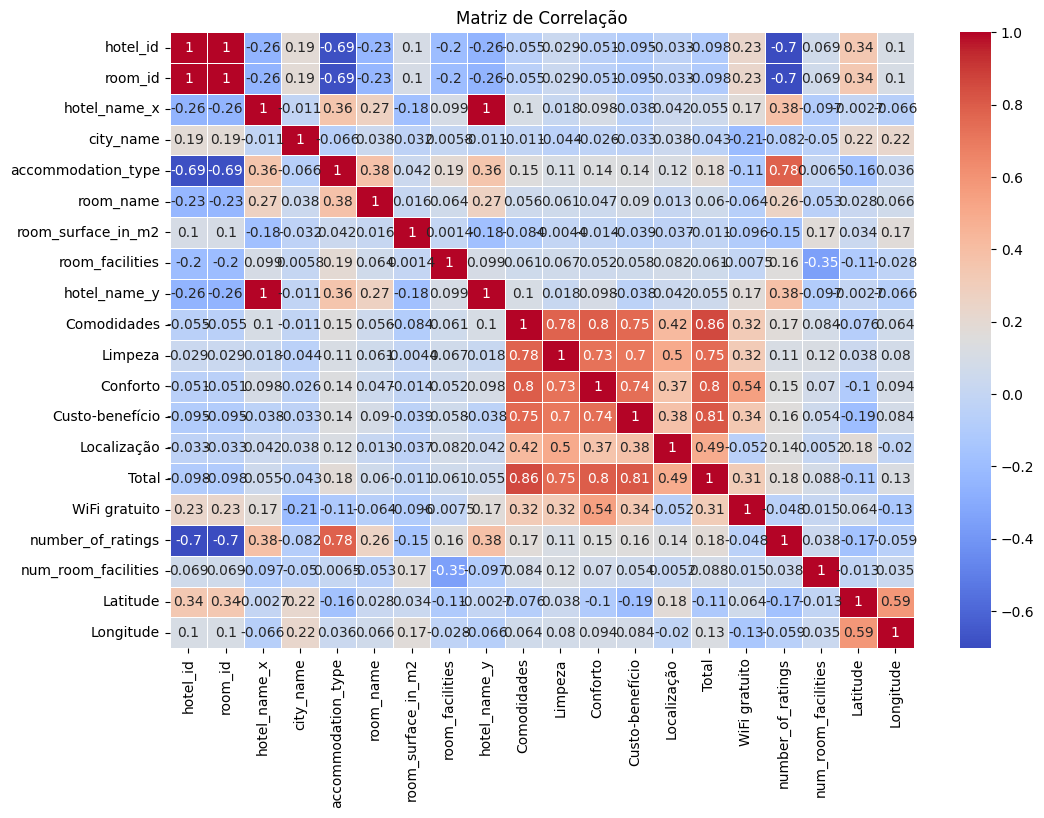

In [147]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

In [148]:
# Supondo que 'imoveis_corr' é o DataFrame após as modificações desejadas
# Exemplo hipotético:
# imoveis_corr = ...

# Calcula as correlações em relação à coluna 'Localização'
correlation_with_location = imoveis_corr.corrwith(imoveis_corr['Localização'])

# Exibe as correlações
print(correlation_with_location)


hotel_id              -0.033433
room_id               -0.033433
hotel_name_x           0.041729
city_name              0.037843
accommodation_type     0.118333
room_name              0.013437
room_surface_in_m2    -0.036877
room_facilities        0.081990
hotel_name_y           0.041729
Comodidades            0.415241
Limpeza                0.500335
Conforto               0.365310
Custo-benefício        0.375742
Localização            1.000000
Total                  0.491720
WiFi gratuito         -0.052225
number_of_ratings      0.139672
num_room_facilities    0.005176
Latitude               0.179049
Longitude             -0.019563
dtype: float64


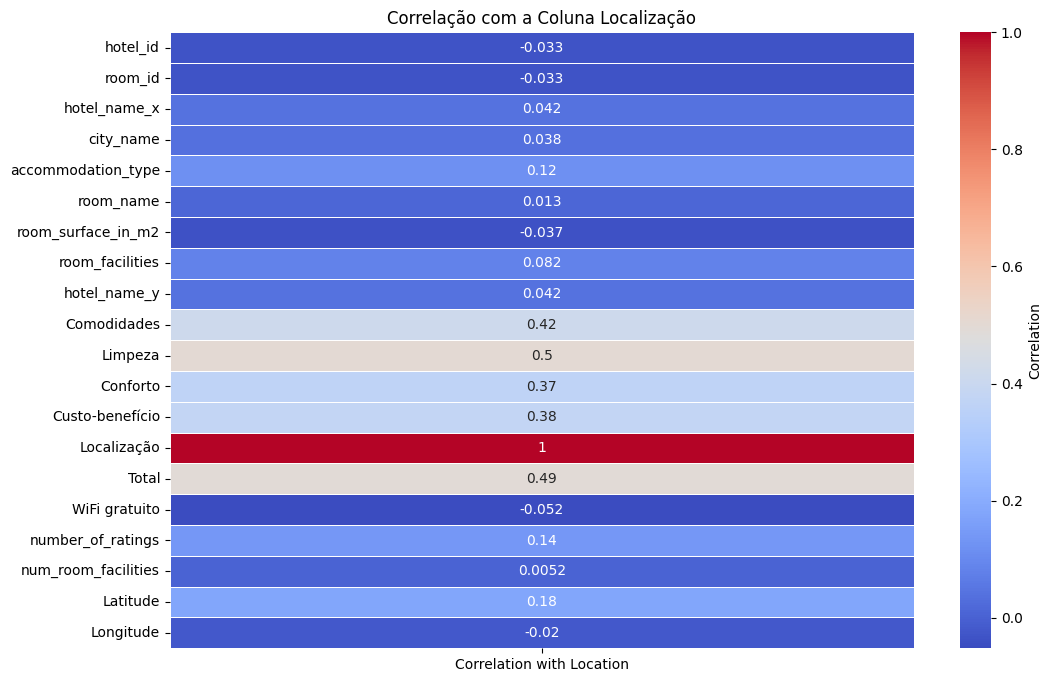

In [149]:
plt.figure(figsize=(12, 8))

# Converte a série em um DataFrame
correlation_df = pd.DataFrame({'Correlation with Location': correlation_with_location})

sns.heatmap(correlation_df, annot=True, cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlação com a Coluna Localização')
plt.show()


## Existem relações entre a nota do anúncio e os recursos disponíveis no imóvel?